In [1]:
import numpy as np
from matplotlib import pyplot as plt
 
import pandas as pd

In [ ]:
from scipy.stats import kurtosis

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data = pd.read_csv('/content/drive/MyDrive/denoised_data2.csv', delimiter = ';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
data.head(10)

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,debora,Woman,46,"1,62",75,"28,6",-0.7,97.3,-62.2,-13.0,20.2,-15.1,-12.6,104.3,-89.4,-158.8,-102.7,-142.2,sitting
1,debora,Woman,46,"1,62",75,"28,6",-0.7,97.3,-62.2,-13.0,20.2,-15.1,-12.6,104.3,-89.4,-158.9,-102.7,-142.1,sitting
2,debora,Woman,46,"1,62",75,"28,6",-0.7,97.3,-62.2,-13.0,20.2,-15.1,-12.6,104.3,-89.4,-158.9,-102.6,-142.1,sitting
3,debora,Woman,46,"1,62",75,"28,6",-0.7,97.3,-62.3,-13.0,20.2,-15.1,-12.6,104.3,-89.4,-159.0,-102.6,-142.1,sitting
4,debora,Woman,46,"1,62",75,"28,6",-0.7,97.3,-62.3,-13.0,20.2,-15.1,-12.6,104.3,-89.4,-159.1,-102.6,-142.1,sitting
5,debora,Woman,46,"1,62",75,"28,6",-0.7,97.3,-62.3,-12.9,20.2,-15.1,-12.6,104.3,-89.4,-159.1,-102.6,-142.1,sitting
6,debora,Woman,46,"1,62",75,"28,6",-0.7,97.3,-62.3,-12.9,20.2,-15.1,-12.6,104.3,-89.4,-159.2,-102.6,-142.1,sitting
7,debora,Woman,46,"1,62",75,"28,6",-0.7,97.4,-62.3,-12.9,20.2,-15.1,-12.6,104.3,-89.4,-159.2,-102.6,-142.0,sitting
8,debora,Woman,46,"1,62",75,"28,6",-0.8,97.4,-62.3,-12.9,20.2,-15.1,-12.6,104.3,-89.4,-159.3,-102.6,-142.0,sitting
9,debora,Woman,46,"1,62",75,"28,6",-0.8,97.4,-62.4,-12.9,20.2,-15.1,-12.7,104.3,-89.4,-159.4,-102.6,-142.0,sitting


In [ ]:
cl = 'standing'
ds= data[(data['user'] == 'debora' ) & (data['class'] == cl)]['x1']
ws= data[(data['user'] == 'wallace' ) & (data['class'] == cl)]['x1']
ks= data[(data['user'] == 'katia' ) & (data['class'] == cl)]['x1']

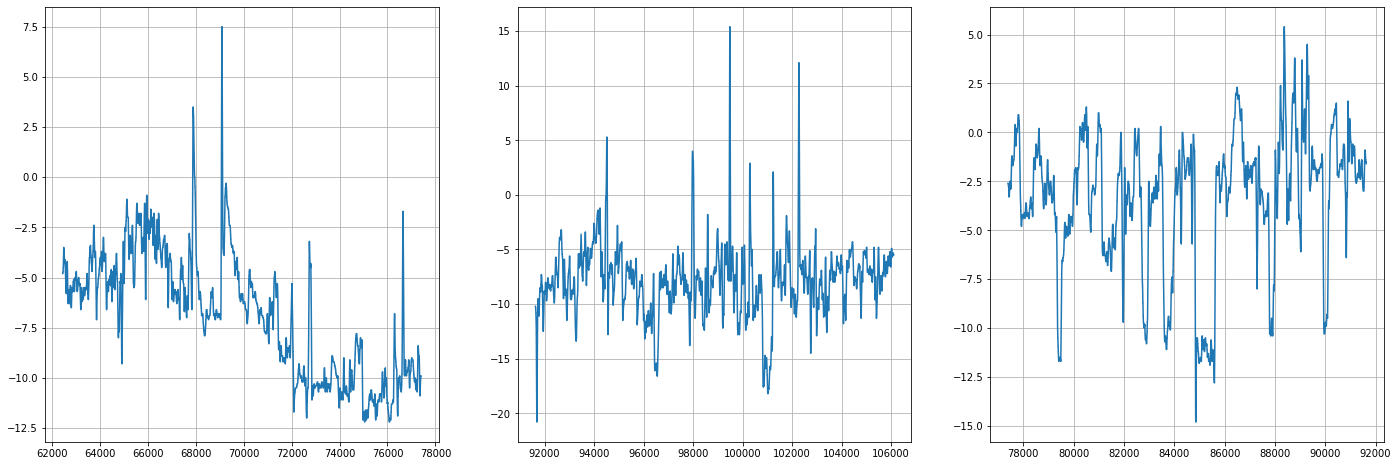

In [ ]:
plt.figure(figsize = (24,8))
plt.subplot( 1,3,1)
 

plt.grid(True)
plt.plot(ds)
plt.subplot( 1,3,2)
 

plt.grid(True)
plt.plot(ws)
plt.subplot( 1,3,3)
 

plt.grid(True)
plt.plot(ks)


In [ ]:
data.columns

Index(['user', 'gender', 'age', 'how_tall_in_meters', 'weight',
       'body_mass_index', 'x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3',
       'x4', 'y4', 'z4', 'class'],
      dtype='object')

In [ ]:
ds=  data[(data['user'] == 'debora' ) & (data['class'] == 'sitting')][['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3','x4', 'y4', 'z4'] ]

In [ ]:
def feature_once_maker(mass , width, part_overlap = 2):
  N = mass.shape[0]
  # mean, std , kurtosis,minmax
  Mean = []
  Minmax = []
  Krt = []
  Std = []
  Ia=0
  Ib=width
  while Ib <= N:
    Mean.append(mass[Ia:Ib].mean() )
    Minmax.append(np.max(mass[Ia:Ib] )  -  np.min(mass[Ia:Ib] ))
    Krt.append(kurtosis(mass[Ia:Ib] ))
    Std.append(np.std(mass[Ia:Ib] ))

    Ib+= width//part_overlap
    Ia+= width//part_overlap
  Mean = np.array(Mean)
  Minmax = np.array(Minmax)
  Krt = np.array(Krt)
  Std =  np.array(Std)
  
  return {'mean':np.round(Mean, 3),
          'Minmax': np.round(Minmax,3),
          'krt':np.round(Krt,3),
          'Std':np.round(Std,3)}



In [ ]:
def feature_triple_maker(Mass ,width, part_overlap = 2):
  N = Mass.shape[0]
  
  # correlation
  Mean = []
  Minmax = []
  Krt = []
  Std = []

  Ia=0
  Ib=width
  while Ib <= N:
    matr = np.corrcoef((Mass.T)[:,Ia:Ib])
    xy.append(matr[0,1])
    xz.append(matr[0,2])
    yz.append(matr[1,2])
    Ib+= width//part_overlap
    Ia+= width//part_overlap
  xy = np.array(xy)
  xz= np.array(xz)
  yz = np.array(yz)   
 
  return {'xy':xy,
          'xz':xz,
          'yz': yz}

In [ ]:
def feature_module_accelerat(Massv ,width, part_overlap = 2):
  N = Massv.shape[0]
  mass = np.zeros(N)
  # 
  Mean = []
  Minmax = []
  Krt = []
  Std = []
  Ia=0
  Ib=width
  for i in range(N):
    mass[i] = np.sqrt(np.sum(Massv[i]*Massv[i]))
    print(mass[i])
  while Ib <= N:
    Mean.append(mass[Ia:Ib].mean() )
    Minmax.append(np.max(mass[Ia:Ib] )  -  np.min(mass[Ia:Ib] ))
    Krt.append(kurtosis(mass[Ia:Ib] ))
    Std.append(np.std(mass[Ia:Ib] ))

    Ib+= width//part_overlap
    Ia+= width//part_overlap

  Mean = np.array(Mean)
  Minmax = np.array(Minmax)
  Krt = np.array(Krt)
  Std =  np.array(Std)
  
  return {'mean':np.round(Mean, 3),
          'Minmax': np.round(Minmax,3),
          'krt':np.round(Krt,3),
          'Std':np.round(Std,3)}

In [ ]:
width = 8
ovlap = 4
DATASET = pd.DataFrame([])
users = ['debora','katia','wallce','jose_carlos']
acts = ['sitting', 'standing', 'walking', 'standingup', 'sittingdown'] 

for cls in acts:
  for usr in users:
    print('prepare ',cls,usr)
    # ds from class and user
    ds=  data[(data['user'] == usr ) & (data['class'] == cls)][['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3','x4', 'y4', 'z4'] ]
    
    # minmax , std, mean, kurtosis from 12 coordinades
    names = ['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3','x4', 'y4', 'z4']
    features_onse =[ ]
    cols_ftr = ['mean','Minmax','krt','Std']
    dict_ftr = {}
    for i in names:
      features_onse.append(feature_once_maker(np.array(ds[i]) , width,ovlap))


    dict_ftr.update( {names[i]+'_'+cols_ftr[0]: features_onse[i][cols_ftr[0]]   for i in range(12)} )
    dict_ftr.update( {names[i]+'_'+cols_ftr[1]: features_onse[i][cols_ftr[1]]   for i in range(12)} )
    dict_ftr.update( {names[i]+'_'+cols_ftr[2]: features_onse[i][cols_ftr[2]]   for i in range(12)} )
    dict_ftr.update( {names[i]+'_'+cols_ftr[3]: features_onse[i][cols_ftr[3]]   for i in range(12)} )
    data_w = pd.DataFrame(dict_ftr)
    # minmax , std, mean, kurtosis from 4 modules of acceleration
    names = [['x1', 'y1', 'z1'], ['x2', 'y2', 'z2'],[ 'x3', 'y3', 'z3'],['x4', 'y4', 'z4']]
    features_onse =[ ]
    names2 = ['a' +str(i) for i in range(1,5)]
    cols_ftr = ['mean','Minmax','krt','Std']
    dict_ftr = {}
    for i in names:
      features_onse.append(feature_module_accelerat(np.array(ds[i]) , width, ovlap))


    dict_ftr.update( {names2[i]+'_'+cols_ftr[0]: features_onse[i][cols_ftr[0]]   for i in range(4)} )
    dict_ftr.update( {names2[i]+'_'+cols_ftr[1]: features_onse[i][cols_ftr[1]]   for i in range(4)} )
    dict_ftr.update( {names2[i]+'_'+cols_ftr[2]: features_onse[i][cols_ftr[2]]   for i in range(4)} )
    dict_ftr.update( {names2[i]+'_'+cols_ftr[3]: features_onse[i][cols_ftr[3]]   for i in range(4)} )
    data_w = pd.concat([data_w ,  pd.DataFrame(dict_ftr)] , axis =1)
    data_w.insert(loc =data_w.shape[1],column ='class' , value = [cls for w in range(data_w.shape[0])] )
    DATASET = pd.concat( [DATASET , data_w] , ignore_index=True)
    print('comleted')


prepare  sitting debora
comleted
prepare  sitting katia
comleted
prepare  sitting wallce
comleted
prepare  sitting jose_carlos
comleted
prepare  standing debora
comleted
prepare  standing katia
comleted
prepare  standing wallce
comleted
prepare  standing jose_carlos
comleted
prepare  walking debora
comleted
prepare  walking katia
comleted
prepare  walking wallce
comleted
prepare  walking jose_carlos
comleted
prepare  standingup debora
comleted
prepare  standingup katia
comleted
prepare  standingup wallce
comleted
prepare  standingup jose_carlos
comleted
prepare  sittingdown debora
comleted
prepare  sittingdown katia
comleted
prepare  sittingdown wallce
comleted
prepare  sittingdown jose_carlos
comleted


In [ ]:
DATASET

,x1_mean,y1_mean,z1_mean,x2_mean,y2_mean,z2_mean,x3_mean,y3_mean,z3_mean,x4_mean,y4_mean,z4_mean,x1_Minmax,y1_Minmax,z1_Minmax,x2_Minmax,y2_Minmax,z2_Minmax,x3_Minmax,y3_Minmax,z3_Minmax,x4_Minmax,y4_Minmax,z4_Minmax,x1_krt,y1_krt,z1_krt,x2_krt,y2_krt,z2_krt,x3_krt,y3_krt,z3_krt,x4_krt,y4_krt,z4_krt,x1_Std,y1_Std,z1_Std,x2_Std,y2_Std,z2_Std,x3_Std,y3_Std,z3_Std,x4_Std,y4_Std,z4_Std,a1_mean,a2_mean,a3_mean,a4_mean,a1_Minmax,a2_Minmax,a3_Minmax,a4_Minmax,a1_krt,a2_krt,a3_krt,a4_krt,a1_Std,a2_Std,a3_Std,a4_Std,class
0,-0.700,97.312,-62.262,-12.962,20.200,-15.100,-12.600,104.300,-89.400,-159.025,-102.625,-142.100,0.0,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.4,0.1,0.2,-3.000,3.143,-1.733,-1.733,-3.000,-3.000,-3.000,-3.000,-3.000,-1.338,-0.667,1.000,0.000,0.033,0.048,0.048,0.000,0.000,0.000,0.000,0.000,0.139,0.043,0.050,115.528,28.356,137.948,236.671,0.138,0.046,0.000,0.202,0.150,-1.733,-3.000,-1.189,0.043,0.022,0.000,0.064,sitting
1,-0.725,97.338,-62.300,-12.938,20.200,-15.100,-12.612,104.300,-89.400,-159.150,-102.600,-142.062,0.1,0.1,0.2,0.1,0.0,0.0,0.1,0.0,0.0,0.5,0.0,0.1,-0.667,-1.733,1.000,-1.733,-3.000,-3.000,3.143,-3.000,-3.000,-0.815,-3.000,-1.733,0.043,0.048,0.050,0.048,0.000,0.000,0.033,0.000,0.000,0.150,0.000,0.048,115.570,28.345,137.949,236.722,0.193,0.046,0.009,0.276,-0.970,-1.733,3.143,-0.605,0.060,0.022,0.003,0.080,sitting
2,-0.750,97.362,-62.338,-12.913,20.200,-15.100,-12.638,104.300,-89.400,-159.275,-102.575,-142.038,0.1,0.1,0.1,0.1,0.0,0.0,0.1,0.0,0.0,0.4,0.1,0.1,-2.000,-1.733,-1.733,3.143,-3.000,-3.000,-1.733,-3.000,-3.000,-1.338,-0.667,-1.733,0.050,0.048,0.048,0.033,0.000,0.000,0.048,0.000,0.000,0.139,0.043,0.048,115.611,28.333,137.951,236.780,0.139,0.046,0.009,0.166,-1.674,3.143,-1.733,-1.316,0.060,0.015,0.004,0.060,sitting
3,-0.775,97.388,-62.362,-12.900,20.200,-15.100,-12.662,104.300,-89.400,-159.412,-102.550,-142.000,0.1,0.1,0.1,0.0,0.0,0.0,0.1,0.0,0.0,0.5,0.1,0.2,-0.667,3.143,-1.733,-3.000,-3.000,-3.000,-1.733,-3.000,-3.000,-1.110,-2.000,1.000,0.043,0.033,0.048,0.000,0.000,0.000,0.048,0.000,0.000,0.169,0.050,0.050,115.646,28.328,137.954,236.839,0.139,0.000,0.009,0.233,0.672,-3.000,-1.733,-1.148,0.047,0.000,0.004,0.077,sitting
4,-0.800,97.400,-62.412,-12.900,20.200,-15.100,-12.688,104.300,-89.400,-159.562,-102.525,-141.962,0.0,0.0,0.2,0.0,0.0,0.0,0.1,0.0,0.0,0.5,0.1,0.1,-3.000,-3.000,-0.314,-3.000,-3.000,-3.000,3.143,-3.000,-3.000,-1.461,-0.667,-1.733,0.000,0.000,0.060,0.000,0.000,0.000,0.033,0.000,0.000,0.180,0.043,0.048,115.684,28.328,137.956,236.907,0.108,0.000,0.009,0.234,-0.315,-3.000,3.143,-1.405,0.032,0.000,0.003,0.084,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57213,-8.638,87.538,-159.500,-6.725,18.762,-44.375,-3.338,119.075,-102.325,-220.675,-104.662,-122.438,0.5,1.3,1.2,0.1,0.4,0.3,0.5,0.1,0.8,1.2,3.7,1.9,-1.101,-1.166,-1.300,-0.667,-0.925,-0.880,-1.101,-0.667,-1.169,-1.258,-1.253,-1.320,0.158,0.418,0.394,0.043,0.141,0.097,0.158,0.043,0.263,0.399,1.220,0.636,182.148,48.646,157.036,273.211,0.402,0.144,0.586,1.535,-1.476,0.651,-1.081,-1.210,0.139,0.042,0.196,0.505,sittingdown
57214,-8.488,87.162,-159.850,-6.750,18.850,-44.275,-3.225,119.075,-102.550,-221.062,-105.750,-121.888,0.5,1.3,1.3,0.1,0.2,0.3,0.3,0.1,0.7,1.4,3.8,2.0,-1.110,-1.166,-1.123,-2.000,-0.250,-1.403,-1.403,-0.667,-1.238,-1.134,-1.214,-1.191,0.169,0.418,0.415,0.050,0.071,0.120,0.120,0.043,0.229,0.453,1.239,0.647,182.268,48.592,157.181,273.697,0.495,0.221,0.375,1.709,-1.109,-1.224,-1.249,-1.162,0.158,0.086,0.124,0.557,sittingdown
57215,-8.338,86.788,-160.212,-6.775,18.888,-44.162,-3.125,119.050,-102.750,-221.462,-106.838,-121.312,0.5,1.3,1.2,0.1,0.1,0.5,0.3,0.1,0.7,1.4,3.9,2.0,-1.461,-1.312,-1.360,-0.667,3.143,-1.101,-0.880,-2.000,-1.238,-1.406,-1.233,-1.191,0.180,0.440,0.408,0.043,0.033,0.158,0.097,0.050,0.229,0.485,1.2

In [ ]:
DATASET.to_csv('/content/drive/MyDrive/dataset_w8_o25.csv',sep = ';' , index=False)